### Model considering both drivers and constructors

### train model to  predict finishing  position of driver using driver, constructor ,grid position and circuit name

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data = "/content/drive/MyDrive/DBDA_PROJECT/Formula1DataAnalytics-main/Main/data"

In [26]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your machine learning code here

# Reset warning filters (optional)
warnings.resetwarnings()
data1 = pd.read_csv(f'{data}/dataframe.csv', encoding='latin1')
# Preprocessing: Encode categorical features
le = LabelEncoder()
for col in ['GP_name', 'driver', 'constructor']:
    data1[col] = le.fit_transform(data1[col])


x= data1[['GP_name','quali_pos','driver','age_at_gp_in_days','driver_confidence','active_driver','position','constructor_reliability','active_constructor']]
#x_c = data[['GP_name','quali_pos','constructor','position','constructor_relaiblity','active_constructor']]

x= x[x['active_constructor']==1]
x= x[x['active_driver']==1]
cleaned_data = data1[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('cleaned_data.csv',index=False)
data1['position'] = data1['position'].astype(int)
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

# Define features (X) and target (y) after preprocessing
X = data1.drop(['position','active_driver','active_constructor','driver_nationality',"constructor_nationality",'country','year','date','status_id','dob','age_at_gp_in_days','driver_home','constructor_home','driver_dnf','constructor_dnf'],axis=1)
y = data1['position'].apply(lambda x: position_index(x))

#Model training
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy') # Use X and y here
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
for model in models:
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.897519994012488
DecisionTreeClassifier : 0.897519994012488
RandomForestClassifier : 0.897519994012488
SVC : 0.897519994012488
GaussianNB : 0.897519994012488
KNeighborsClassifier : 0.897519994012488


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:

from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your feature matrix and target values
# X should be a numpy array or pandas DataFrame, and y should be a numpy array or pandas Series

# Create a RandomForestClassifier instance
rfc = RandomForestClassifier()

# Fit the model on the entire dataset
rfc.fit(X, y)

RandomForestClassifier()

In [29]:
new_data = pd.DataFrame({
    'GP_name': [0],  # Ensure correct column order
    'quali_pos': [18],
    'driver': [43],
    'driver_confidence': [0.800000],
    'constructor': [13],
    'constructor_reliability': [0.530151]
})  # Ensure these match exactly

new_data = new_data[rfc.feature_names_in_]
prediction = rfc.predict(new_data)
print(prediction)


[3]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
import pickle
path = "/content/drive/MyDrive/DBDA_PROJECT/Formula1DataAnalytics-main/Main"
with open(f'{path}/raoforest.pkl', 'wb') as model_file:
    pickle.dump(rfc, model_file)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# Load the model from the file using pickle
with open(f'{path}/raoforest.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model for predictions
predictions = loaded_model.predict(new_data)
predictions

array([3])

In [38]:
import os
# Check if the file exists in the current working directory
if os.path.exists('raoforest.pkl'):
    print("File 'raoforest.pkl' found in the current directory.")
    pickle_file_path = os.path.abspath('raoforest.pkl')
# Check if the file exists in the specified Google Drive path
elif os.path.exists('/content/drive/MyDrive/DBDA_PROJECT/Formula1DataAnalytics-main/Main'):
    print("File 'raoforest.pkl' found in the specified Google Drive path.")
    pickle_file_path = os.path.abspath('/content/drive/MyDrive/DBDA_PROJECT/Formula1DataAnalytics-main/Main')
else:
    print("File 'raoforest.pkl' not found in either location.")
    pickle_file_path = None

print(f"Pickle file path: {pickle_file_path}")


File 'raoforest.pkl' found in the current directory.
Pickle file path: /content/raoforest.pkl


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


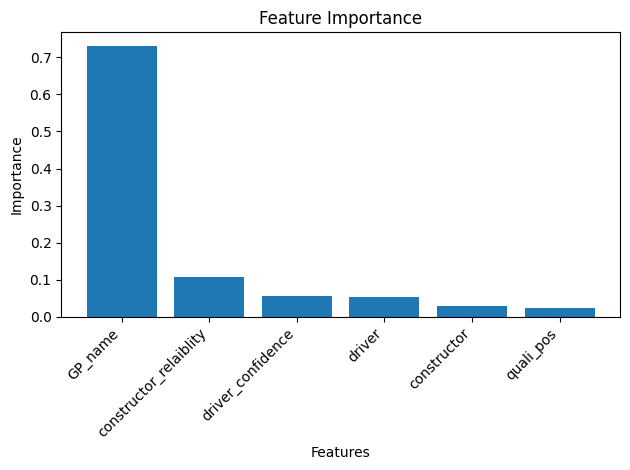

In [32]:
import numpy as np

# Feature names (replace with your actual feature names)
feature_names = ['quali_pos', 'constructor', 'GP_name', 'driver', 'driver_confidence','constructor_relaiblity']
# Get feature importances
feature_importances = rfc.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

# Create bar chart with feature names as x-axis labels
plt.bar(sorted_features, sorted_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()  # Adjust layout for better readability
plt.show()